In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
#2.a
dataset = pd.read_csv("50_Startups.csv")
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [64]:
for x in dataset.index:
  if dataset.loc[x, 'R&D Spend'] <= 0:
    dataset.loc[x,'R&D Spend'] = round(dataset['R&D Spend'].median(),2)

for x in dataset.index:
  if dataset.loc[x, 'Administration'] < 30000:
    dataset.loc[x,'Administration'] = round(dataset['Administration'].mean(),2)

for x in dataset.index:
  if dataset.loc[x, 'Marketing Spend'] < 50000:
    dataset.loc[x,'Marketing Spend'] = round(dataset['Marketing Spend'].mean(),2)


#2.b
dataset.dropna(inplace = True)
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [65]:
#2.c
dataset = dataset.drop('State', axis = 1)
print(dataset)

    R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261776.23  129917.04
16   78013.11 

In [66]:
#2.d
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:, -1]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
#2.e
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [94]:
Y_pred = model.predict(X_test)

#print(Y_pred)


In [95]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print(score)

0.9236478824442386


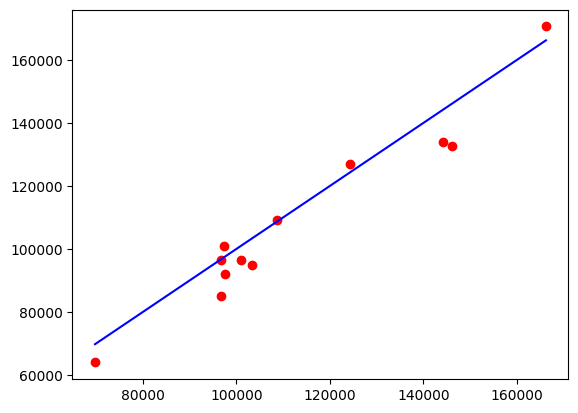

In [96]:
plt.scatter(Y_test, Y_pred, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(),Y_test.max()], color = 'blue')
plt.show()

In [109]:
new_data = np.array([45500, 112000, 353000]).reshape(1, -1)
print(new_data)

[[ 45500 112000 353000]]


In [114]:
new_predictions = model.predict(new_data)
print(new_predictions)

[93245.40883049]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
